# Wine Quality Prediction Project 

#### By using machine learning for wine quality prediction enhances operational efficiency, provides objective information to consumers, and supports decision-making in the wine industry. In this project I am using the wine quality dataset available on Kaggle for free.

#### https://www.kaggle.com/datasets/yasserh/wine-quality-dataset?resource=download&select=WineQT.csv


## Objective

#### Predict whether a wine is of good or bad quality based on factors such as chemical composition and other relevant attributes.

#### The main idea is to predict wine quality by applying a Deep Neural Network model.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from imblearn.over_sampling import SMOTE



from sklearn.model_selection import train_test_split
#from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler


from sklearn import metrics
from sklearn.metrics import accuracy_score

from sklearn.model_selection import cross_val_score

from sklearn.metrics import confusion_matrix


import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau


In [2]:
df = pd.read_csv('WineQT.csv')
print(df.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  Id  
0      9.4        5   0  
1      9.8        5   1  
2      9

In [3]:
# type of data present in each of the columns present in the dataset.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB



#### Dataset consists of 1143 rows and 13 columns. Data type of almost variable are float

In [4]:
#descriptive statistical measures of the dataset.

df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1143.0,8.311111,1.747595,4.60000,7.10000,7.90000,9.100000,15.90000
volatile acidity,1143.0,0.531339,0.179633,0.12000,0.39250,0.52000,0.640000,1.58000
citric acid,1143.0,0.268364,0.196686,0.00000,0.09000,0.25000,0.420000,1.00000
residual sugar,1143.0,2.532152,1.355917,0.90000,1.90000,2.20000,2.600000,15.50000
chlorides,1143.0,0.086933,0.047267,0.01200,0.07000,0.07900,0.090000,0.61100
free sulfur dioxide,1143.0,15.615486,10.250486,1.00000,7.00000,13.00000,21.000000,68.00000
total sulfur dioxide,1143.0,45.914698,32.782130,6.00000,21.00000,37.00000,61.000000,289.00000
density,1143.0,0.996730,0.001925,0.99007,0.99557,0.99668,0.997845,1.00369
pH,1143.0,3.311015,0.156664,2.74000,3.20500,3.31000,3.400000,4.01000
sulphates,1143.0,0.657708,0.170399,0.33000,0.55000,0.62000,0.730000,2.00000


# Data Processing

In [5]:
# df['quality'] = df.quality.apply(lambda x:2 if x>6 else 0 if x<=5 else 1 )
df['quality'] = df.quality.apply(lambda x:1 if x>6 else 0 )


In [6]:
df['quality'].value_counts()

quality
0    984
1    159
Name: count, dtype: int64

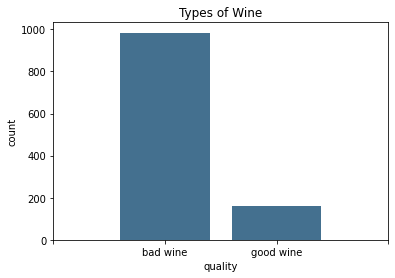

In [7]:
# Plot quality classification 
      
df['quality'].value_counts()
      
plt.figure(num=None)
sb.countplot(data = df, x = 'quality', saturation=0.5)
plt.title("Types of Wine")
plt.xticks([-1,0,1,2], ['','bad wine','good wine', ''])
plt.show()

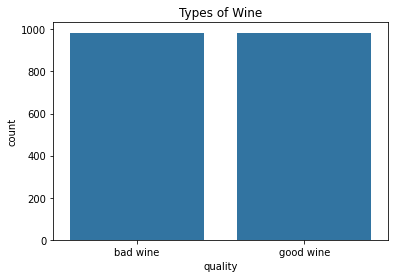

In [9]:

# Define features and target
X = df.drop(['quality', 'Id'], axis=1)
y = df['quality']

# Apply SMOTE
oversample = SMOTE()
X_ros, y_ros = oversample.fit_resample(X, y)

# Plot the results
sb.countplot(x=y_ros)
plt.xticks([0, 1], ['bad wine', 'good wine'])
plt.title("Types of Wine")
plt.show()


In [11]:
# split dataset to train and test variable 
# use test size of 20% of the data proportion
X_train, X_test, y_train, y_test = train_test_split(X_ros, y_ros, test_size=0.2, random_state=42)
X_train.shape, X_test.shape


((1574, 11), (394, 11))

In [12]:
# scale with StandardScaler
scaler = StandardScaler()

# fit to data training
scaler.fit(X_train)

# transform
x_train = scaler.transform(X_train)
x_test = scaler.transform(X_test)

## Deep Neural Network model

In [13]:

# Crear el modelo secuencial
model = Sequential()

# Añadir capas densas
model.add(Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.0001),input_shape=(X_train.shape[1],)))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.0001)))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.0001)))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.0001)))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.0001)))
model.add(Dense(1, activation='sigmoid'))  # 1 nodo de salida para clasificación binaria


# Definir el learning rate
learning_rate = 0.001

# Compilar el modelo con el optimizador Adam y el learning rate especificado

model.compile(optimizer=Adam(learning_rate=learning_rate), loss='binary_crossentropy', metrics=['accuracy'])

# Define the ReduceLROnPlateau callback
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=20, min_lr=1e-5)


# Definir EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=50, restore_best_weights=True)


# Entrenar el modelo
history= model.fit(X_train, y_train, epochs=1000, batch_size=64, validation_data=(X_test, y_test), 
                  callbacks=[early_stopping, reduce_lr])

# Evaluar el modelo
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Loss: {loss}, Accuracy: {accuracy}')


# Calculate predictions
train_preds = model.predict(X_train)
val_preds = model.predict(X_test)

# Convertir las probabilidades en etiquetas binarias
train_preds_bin = (train_preds > 0.5).astype(int)
val_preds_bin = (val_preds > 0.5).astype(int)

# Calcular la precisión de entrenamiento y validación
print(f'Training Accuracy: {metrics.accuracy_score(y_train, train_preds_bin):.4f}')
print(f'Validation Accuracy: {metrics.accuracy_score(y_test, val_preds_bin):.4f}')
print()


Epoch 1/1000
25/25 [==============================] - 2s 20ms/step - loss: 0.8034 - accuracy: 0.5832 - val_loss: 0.7240 - val_accuracy: 0.6091 - lr: 0.0010
Epoch 2/1000
25/25 [==============================] - 0s 6ms/step - loss: 0.7245 - accuracy: 0.6398 - val_loss: 0.7118 - val_accuracy: 0.6142 - lr: 0.0010
Epoch 3/1000
25/25 [==============================] - 0s 6ms/step - loss: 0.6603 - accuracy: 0.6792 - val_loss: 0.7571 - val_accuracy: 0.6218 - lr: 0.0010
Epoch 4/1000
25/25 [==============================] - 0s 7ms/step - loss: 0.6300 - accuracy: 0.7058 - val_loss: 0.8246 - val_accuracy: 0.5254 - lr: 0.0010
Epoch 5/1000
25/25 [==============================] - 0s 6ms/step - loss: 0.5872 - accuracy: 0.7440 - val_loss: 0.8658 - val_accuracy: 0.5330 - lr: 0.0010
Epoch 6/1000
25/25 [==============================] - 0s 5ms/step - loss: 0.5675 - accuracy: 0.7433 - val_loss: 0.8071 - val_accuracy: 0.6117 - lr: 0.0010
Epoch 7/1000
25/25 [==============================] - 0s 5ms/step - l

25/25 [==============================] - 0s 4ms/step - loss: 0.4120 - accuracy: 0.8532 - val_loss: 0.3479 - val_accuracy: 0.8680 - lr: 0.0010
Epoch 54/1000
25/25 [==============================] - 0s 4ms/step - loss: 0.4221 - accuracy: 0.8355 - val_loss: 0.3459 - val_accuracy: 0.8807 - lr: 0.0010
Epoch 55/1000
25/25 [==============================] - 0s 4ms/step - loss: 0.4158 - accuracy: 0.8539 - val_loss: 0.3153 - val_accuracy: 0.9036 - lr: 0.0010
Epoch 56/1000
25/25 [==============================] - 0s 4ms/step - loss: 0.4033 - accuracy: 0.8488 - val_loss: 0.3080 - val_accuracy: 0.8985 - lr: 0.0010
Epoch 57/1000
25/25 [==============================] - 0s 4ms/step - loss: 0.4067 - accuracy: 0.8443 - val_loss: 0.3106 - val_accuracy: 0.9137 - lr: 0.0010
Epoch 58/1000
25/25 [==============================] - 0s 4ms/step - loss: 0.4150 - accuracy: 0.8482 - val_loss: 0.3721 - val_accuracy: 0.8553 - lr: 0.0010
Epoch 59/1000
25/25 [==============================] - 0s 4ms/step - loss: 0.4

25/25 [==============================] - 0s 4ms/step - loss: 0.3569 - accuracy: 0.8723 - val_loss: 0.2809 - val_accuracy: 0.9010 - lr: 0.0010
Epoch 106/1000
25/25 [==============================] - 0s 4ms/step - loss: 0.3720 - accuracy: 0.8659 - val_loss: 0.2768 - val_accuracy: 0.9239 - lr: 0.0010
Epoch 107/1000
25/25 [==============================] - 0s 4ms/step - loss: 0.3694 - accuracy: 0.8717 - val_loss: 0.3591 - val_accuracy: 0.8832 - lr: 0.0010
Epoch 108/1000
25/25 [==============================] - 0s 4ms/step - loss: 0.3650 - accuracy: 0.8799 - val_loss: 0.3204 - val_accuracy: 0.8832 - lr: 0.0010
Epoch 109/1000
25/25 [==============================] - 0s 4ms/step - loss: 0.3838 - accuracy: 0.8558 - val_loss: 0.3253 - val_accuracy: 0.8909 - lr: 0.0010
Epoch 110/1000
25/25 [==============================] - 0s 4ms/step - loss: 0.3793 - accuracy: 0.8602 - val_loss: 0.3549 - val_accuracy: 0.8832 - lr: 0.0010
Epoch 111/1000
25/25 [==============================] - 0s 4ms/step - los

25/25 [==============================] - 0s 4ms/step - loss: 0.3504 - accuracy: 0.8818 - val_loss: 0.2656 - val_accuracy: 0.9162 - lr: 0.0010
Epoch 158/1000
25/25 [==============================] - 0s 4ms/step - loss: 0.3409 - accuracy: 0.8888 - val_loss: 0.2853 - val_accuracy: 0.8934 - lr: 0.0010
Epoch 159/1000
25/25 [==============================] - 0s 4ms/step - loss: 0.3256 - accuracy: 0.8869 - val_loss: 0.2777 - val_accuracy: 0.9188 - lr: 0.0010
Epoch 160/1000
25/25 [==============================] - 0s 4ms/step - loss: 0.3498 - accuracy: 0.8761 - val_loss: 0.2775 - val_accuracy: 0.9036 - lr: 0.0010
Epoch 161/1000
25/25 [==============================] - 0s 4ms/step - loss: 0.3533 - accuracy: 0.8653 - val_loss: 0.2783 - val_accuracy: 0.9086 - lr: 0.0010
Epoch 162/1000
25/25 [==============================] - 0s 4ms/step - loss: 0.3449 - accuracy: 0.8831 - val_loss: 0.3305 - val_accuracy: 0.8680 - lr: 0.0010
Epoch 163/1000
25/25 [==============================] - 0s 4ms/step - los

25/25 [==============================] - 0s 4ms/step - loss: 0.2914 - accuracy: 0.9047 - val_loss: 0.2276 - val_accuracy: 0.9188 - lr: 2.5000e-04
Epoch 209/1000
25/25 [==============================] - 0s 4ms/step - loss: 0.2820 - accuracy: 0.9142 - val_loss: 0.2247 - val_accuracy: 0.9340 - lr: 2.5000e-04
Epoch 210/1000
25/25 [==============================] - 0s 4ms/step - loss: 0.2801 - accuracy: 0.9091 - val_loss: 0.2337 - val_accuracy: 0.9239 - lr: 2.5000e-04
Epoch 211/1000
25/25 [==============================] - 0s 4ms/step - loss: 0.2893 - accuracy: 0.9066 - val_loss: 0.2295 - val_accuracy: 0.9289 - lr: 2.5000e-04
Epoch 212/1000
25/25 [==============================] - 0s 4ms/step - loss: 0.2687 - accuracy: 0.9085 - val_loss: 0.2243 - val_accuracy: 0.9239 - lr: 2.5000e-04
Epoch 213/1000
25/25 [==============================] - 0s 4ms/step - loss: 0.2776 - accuracy: 0.9117 - val_loss: 0.2306 - val_accuracy: 0.9264 - lr: 2.5000e-04
Epoch 214/1000
25/25 [===========================

Epoch 259/1000
25/25 [==============================] - 0s 4ms/step - loss: 0.2708 - accuracy: 0.9123 - val_loss: 0.2050 - val_accuracy: 0.9442 - lr: 2.5000e-04
Epoch 260/1000
25/25 [==============================] - 0s 4ms/step - loss: 0.2501 - accuracy: 0.9212 - val_loss: 0.1966 - val_accuracy: 0.9442 - lr: 2.5000e-04
Epoch 261/1000
25/25 [==============================] - 0s 4ms/step - loss: 0.2643 - accuracy: 0.9219 - val_loss: 0.1995 - val_accuracy: 0.9365 - lr: 2.5000e-04
Epoch 262/1000
25/25 [==============================] - 0s 4ms/step - loss: 0.2626 - accuracy: 0.9161 - val_loss: 0.1918 - val_accuracy: 0.9442 - lr: 2.5000e-04
Epoch 263/1000
25/25 [==============================] - 0s 4ms/step - loss: 0.2608 - accuracy: 0.9149 - val_loss: 0.1997 - val_accuracy: 0.9315 - lr: 2.5000e-04
Epoch 264/1000
25/25 [==============================] - 0s 4ms/step - loss: 0.2656 - accuracy: 0.9136 - val_loss: 0.2109 - val_accuracy: 0.9315 - lr: 2.5000e-04
Epoch 265/1000
25/25 [============

Epoch 310/1000
25/25 [==============================] - 0s 4ms/step - loss: 0.2321 - accuracy: 0.9339 - val_loss: 0.1926 - val_accuracy: 0.9467 - lr: 1.2500e-04
Epoch 311/1000
25/25 [==============================] - 0s 4ms/step - loss: 0.2357 - accuracy: 0.9257 - val_loss: 0.1945 - val_accuracy: 0.9416 - lr: 1.2500e-04
Epoch 312/1000
25/25 [==============================] - 0s 4ms/step - loss: 0.2388 - accuracy: 0.9238 - val_loss: 0.1909 - val_accuracy: 0.9442 - lr: 1.2500e-04
Epoch 313/1000
25/25 [==============================] - 0s 4ms/step - loss: 0.2261 - accuracy: 0.9282 - val_loss: 0.1961 - val_accuracy: 0.9467 - lr: 1.2500e-04
Epoch 314/1000
25/25 [==============================] - 0s 4ms/step - loss: 0.2243 - accuracy: 0.9377 - val_loss: 0.1934 - val_accuracy: 0.9416 - lr: 1.2500e-04
Epoch 315/1000
25/25 [==============================] - 0s 4ms/step - loss: 0.2300 - accuracy: 0.9212 - val_loss: 0.1878 - val_accuracy: 0.9442 - lr: 1.2500e-04
Epoch 316/1000
25/25 [============

Epoch 361/1000
25/25 [==============================] - 0s 4ms/step - loss: 0.2285 - accuracy: 0.9288 - val_loss: 0.1901 - val_accuracy: 0.9467 - lr: 6.2500e-05
Epoch 362/1000
25/25 [==============================] - 0s 4ms/step - loss: 0.2336 - accuracy: 0.9295 - val_loss: 0.1909 - val_accuracy: 0.9467 - lr: 6.2500e-05
Epoch 363/1000
25/25 [==============================] - 0s 4ms/step - loss: 0.2173 - accuracy: 0.9346 - val_loss: 0.1860 - val_accuracy: 0.9467 - lr: 6.2500e-05
Epoch 364/1000
25/25 [==============================] - 0s 4ms/step - loss: 0.2164 - accuracy: 0.9365 - val_loss: 0.1874 - val_accuracy: 0.9442 - lr: 6.2500e-05
Epoch 365/1000
25/25 [==============================] - 0s 4ms/step - loss: 0.2399 - accuracy: 0.9238 - val_loss: 0.1858 - val_accuracy: 0.9467 - lr: 6.2500e-05
Epoch 366/1000
25/25 [==============================] - 0s 4ms/step - loss: 0.2164 - accuracy: 0.9384 - val_loss: 0.1854 - val_accuracy: 0.9442 - lr: 6.2500e-05
Epoch 367/1000
25/25 [============

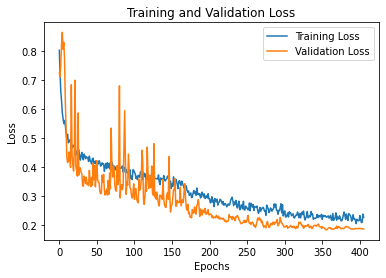

In [14]:
# Plot training & validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

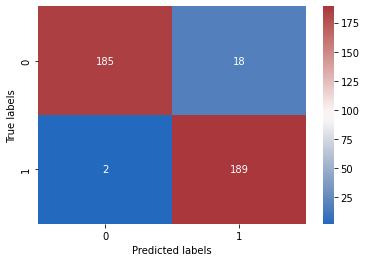

In [15]:
# Visualizing confusion matrix
conf_matrix = confusion_matrix(y_test, val_preds_bin)

sb.heatmap(conf_matrix, cmap="vlag", annot=True, fmt='d')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

In [16]:
# Print the classification report for the best performing model.

print(metrics.classification_report(y_test,val_preds_bin))

              precision    recall  f1-score   support

           0       0.99      0.91      0.95       203
           1       0.91      0.99      0.95       191

    accuracy                           0.95       394
   macro avg       0.95      0.95      0.95       394
weighted avg       0.95      0.95      0.95       394



In [17]:
# Save the model
model.save('dnn_model.h5')

# Load the model
#loaded_model = tf.keras.models.load_model('my_model.h5')
